# ¡Hola Samantha! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class='alert alert-block alert-success'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class='alert alert-block alert-warning'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class='alert alert-block alert-danger'>

<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class='alert alert-block alert-info'>
<b>Respuesta estudiante.</b> <a class='tocSkip'></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión v1 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Buen trabajo Samantha! Has completado correctamente todo lo necesario del notebook, realizaste un gran trabajo aplicando los conocimientos de analítica necesarios, se nota que los manejas muy bien. No tengo comentarios de corrección obligatorios, pero he dejado algunos comentarios opcionales que ayudarán a complementar tu notebook. De todas formas, tu proyecto está aprobado. Felicitaciones por completar el notebook en la primera revisión, mucho éxito en el siguiente sprint!

Saludos!

</div>

----

PROYECTO 6

Paso 1. 

In [ ]:
# Importamos las librerias y cargamos nuestro df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df_games = pd.read_csv(
    '/Users/manuelcruz/Desktop/Samantha_Curso/Portafolio/Portafolio_DataScience/Proyecto_1/games.csv')

In [5]:
# Revisamos nuestro dataframe
print(df_games.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [6]:
# Revisamos la informacion general
print(df_games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Excelente uso de las funciones de `head()` e `info()`. Esto permite observar claramente el tamaño de la data, donde hay nulos y ver una muestra. 

</div>

In [7]:
# Contamos los valores nulos por columna
print(df_games.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


Paso 2. 

Limpieza y preparación de datos. 

In [8]:
# Pasamos todos los nombres de las columnas a minúsculas.
df_games.columns = df_games.columns.str.lower()
print(df_games.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [17]:
# La columna year_of_release esta en decimal, la vamos a pasar a int
df_games['year_of_release'] = df_games['year_of_release'].astype('Int64')

# La columna user_score se encuentra en formato incorrecto (object), la pasaremos a float.
# Y los "tbd" se pasaron a NaN con ayuda de errors='coerce'
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

In [18]:
print(df_games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB
None


Manejo de las columnas:
1. Las columnas genre y name solo tiene 2 valores ausentes, por lo tanto no representan ningun problema, se pueden descartar.
2. La columna year_of_release se paso a int, ya que estaban en decimales los años. Tiene 269 valores ausentes, pero como no se pueden inventar los años los dejamos como NaN.
3. na_sales, eu_sales, jp_sales y other_sales se encuentran en decimales y no cuentan con valores ausentes.
4. critic_score y user_score tienen demasiados valores ausentes, 8578 y 6701 respectivamente. Dejamos NaN los valores ausentes porque no podemos ponerle en 0, afectaria mucho, ya que significaria que lo calificaron con 0.
5. en user_score los tbd los pasamos a nan con ayuda de error='coerce'
6. la columna de rating cuenta con 6,766 valores ausentes, tambien son muchos, o sea que esos juegos no fueron evaluados por la ESRB. Los dejamos como valores ausentes.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>

Bien hecho. En los casos donde hay demasiados en una columna, me parece bien dejar los nulos tal como están o reemplazarlos por algún valor identificable. En este caso, no hay data suficiente para hacer una imputación adecuada y en caso de rellenar con la media o mediana, se introduce un sesgo muy fuerte en la data, por lo que no es adecuado.



</div>

Ahora, calculamos las Ventas totates

In [11]:
df_games['total_sales'] = (
    df_games['na_sales']+df_games['eu_sales']+df_games['jp_sales']+df_games['other_sales'])
print(df_games[['name', 'year_of_release', 'na_sales',
      'eu_sales', 'jp_sales', 'other_sales', 'total_sales']].head())

                       name  year_of_release  na_sales  eu_sales  jp_sales  \
0                Wii Sports             2006     41.36     28.96      3.77   
1         Super Mario Bros.             1985     29.08      3.58      6.81   
2            Mario Kart Wii             2008     15.68     12.76      3.79   
3         Wii Sports Resort             2009     15.61     10.93      3.28   
4  Pokemon Red/Pokemon Blue             1996     11.27      8.89     10.22   

   other_sales  total_sales  
0         8.45        82.54  
1         0.77        40.24  
2         3.29        35.52  
3         2.95        32.77  
4         1.00        31.38  


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Muy bien, también podrías haber usado

```python
    df[['na_sales','jp_sales','eu_sales','other_sales']].sum(axis=1)
```
</div>


Paso 3. Analizar los datos

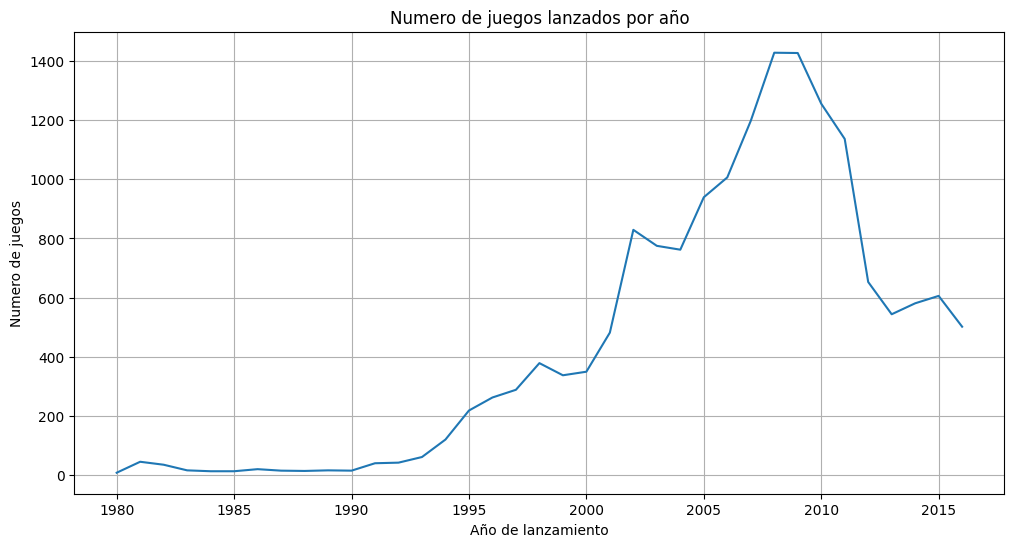

In [12]:
# Grafica para poder ver la cantidad de Juegos que fueron lanzados en diferentes años.
# Contamos el numero de juegos por año
games_per_year = df_games['year_of_release'].value_counts().sort_index()

# Grafica de num de juegos por año
plt.figure(figsize=(12, 6))
sns.lineplot(x=games_per_year.index, y=games_per_year.values)
plt.title('Numero de juegos lanzados por año')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Numero de juegos')
plt.grid(True)
plt.show()

En la grafica de aqui arriba "Numero de juegos lanzados por año" 
1. Podemos observar que la mayor cantidad de juevos lanzados fueron entre el 2008 y 2009.
2. Entre 1993 y 1994 comienza a repuntar los lanzamientos. A partir del año 2000 se ve un considerable incremento en la creacion de juegos. 
3. Despues del 2009 comienzan a bajar los lanzamientos.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor     </b> <a class="tocSkip"></a>

Bien, correcto. El gráfico es claro, hubo un peak a fines de los 2000 y luego ha caido a niveles similares a los de inicios del 2000.

</div>

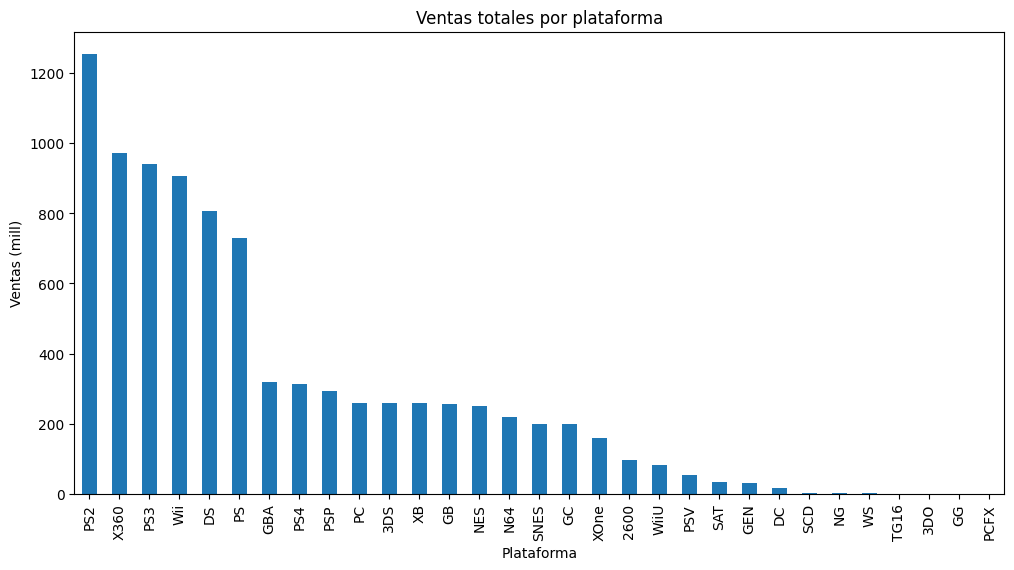

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64


In [13]:
# Ventas por plataforma, de mayor a menor
platform_sales = df_games.groupby(
    'platform')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
platform_sales.plot(kind='bar')
plt.title('Ventas totales por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Ventas (mill)')
plt.show()

print(platform_sales.head(10))

Grafica Ventas Totales por Plataforma
1. Aqui podemos ver claramente las plataformas con mayores ventas.
2. Los lideres son PS2, X360, PS3, Wii, DS y PS.
3. Esta grafica abarca todos los años.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Muy bien con el gráfico, dado que las barras están ordenadas, se puede apreciar claramente las plataformas más exitosas

</div>

<Figure size 1200x600 with 0 Axes>

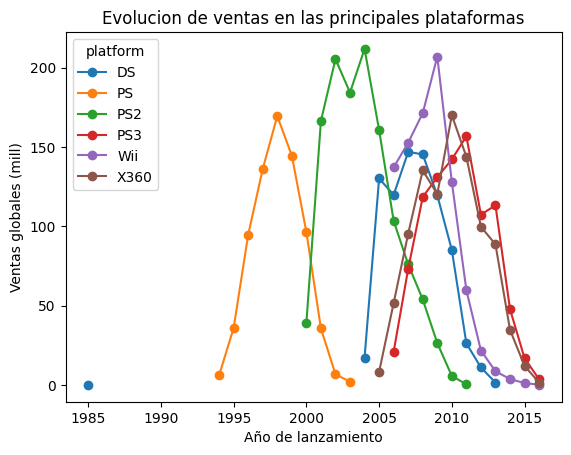

In [14]:
# Evolucion de Ventas por año en las principales plataformas. Tomare las 6 con mayor venta.
top_platforms = platform_sales.head(6).index
platform_year_sales = df_games[df_games['platform'].isin(top_platforms)].groupby(
    ['year_of_release', 'platform'])['total_sales'].sum().unstack()

plt.figure(figsize=(12, 6))
platform_year_sales.plot(kind='line', marker='o')
plt.title('Evolucion de ventas en las principales plataformas')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas globales (mill)')
plt.show()

Grafica Evolucion de Ventas en las principales plataformas
Esta grafica nos permite darnos una idea del ciclo de vida de cada juego, desde su lanzamiento hasta su deceso. 
Podemos ver que generalmente, desde su lanzamiento hasta llegar al tope de sus ventas, les lleva unos 5 años aproximadamente. Despues comienza su declive, que tambien le lleva otros 5 años.
Esto tambien nos permite ver que cada 5 años, PS hace un nuevo lanzamiento.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Excelente, muy buen gráfico, permite apreciar el periodo de vida de cada consola, incluyendo su auge y luego caída.

</div>

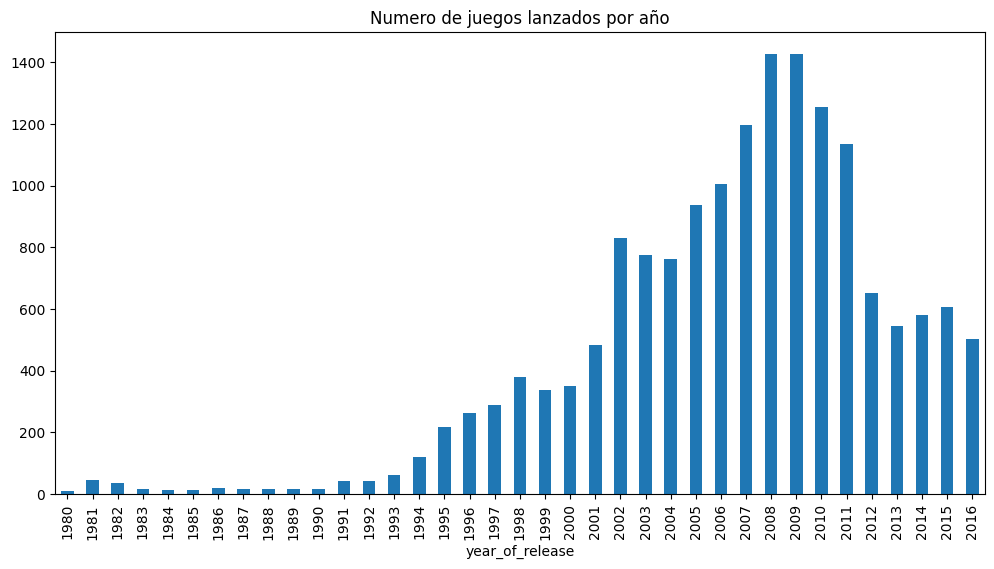

In [15]:
# Determinar el periodo mas significativo. Numero de juegos lanzados por año
games_per_year.plot(kind='bar', figsize=(12, 6))
plt.axvline(x=2000, color='pink', linestyle='--')
plt.title('Numero de juegos lanzados por año')
plt.show()

Esta grafica Numero de juegos lanzados por año, igual que la primera que vimos, solo que con los años mas claros. Podemos observar el auge maximo se da en los anos 2008 y 2009.
En los 90s podemos ver el incremento en los lanzamientos de juegos.

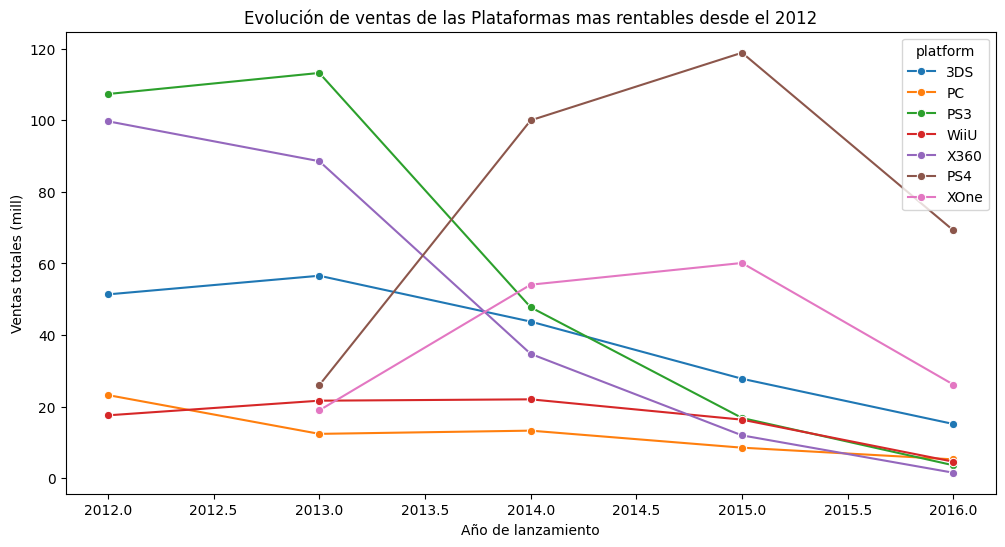

Top plataformas más rentables desde 2012:
platform
PS4     314.14
PS3     288.79
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
Name: total_sales, dtype: float64


In [20]:
# Vamos a tomar a partir del año 2012
df_2012 = df_games[df_games['year_of_release'] >= 2012]
platform_sales_2012 = df_2012.groupby(
    'platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales_2012.head(7).index

recent_top = df_2012[df_2012['platform'].isin(top_platforms)]
recent_top_grouped = recent_top.groupby(['year_of_release', 'platform'])[
    'total_sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=recent_top_grouped, x='year_of_release',
             y='total_sales', hue='platform', marker="o")
plt.title('Evolución de ventas de las Plataformas mas rentables desde el 2012')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Ventas totales (mill)')
plt.show()

print("Top plataformas más rentables desde 2012:")
print(platform_sales_2012.head(7))

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

El objetivo de la data a analizar posteriormente es que sea data que sirva para proyectar el 2017. En ese sentido, no se puede utilizar data muy antigua, ya que eso incluiría consolas que ya no existen y tendencias que ya no se repetirán para las consolas aún vigentes. En general, un mínimo de 2 años es suficiente y hasta 4 años puede ser útil. Tomar más años provocaría el problema que menciono.
    
Cambia el periodo de tiempo, reducelo a 3 o 4 años y revisa cómo cambian los análisis de las secciones siguientes. Por ahora revisaré con la data analizada en esta iteración.    

</div>

El periodo que tome en cuenta fue desde 1990, para que en mi top 7 pudiera aparecer el PS4 y asi poder tomarlo en cuenta (aunque sus ventas no son tan significativas como los otros), sino mas bien como una referencia.

AHORA YA TOME EN CUENTA DESDE EL 2012 (sólo 4 años atras)
El top de plataformas esta encabezado por PS4, seguido por el PS3 y X360. Para el 2017 se puede pronosticar lo que mayor venta tendran sera el PS4, XOne y 3DS (aunque ya van en bajada).

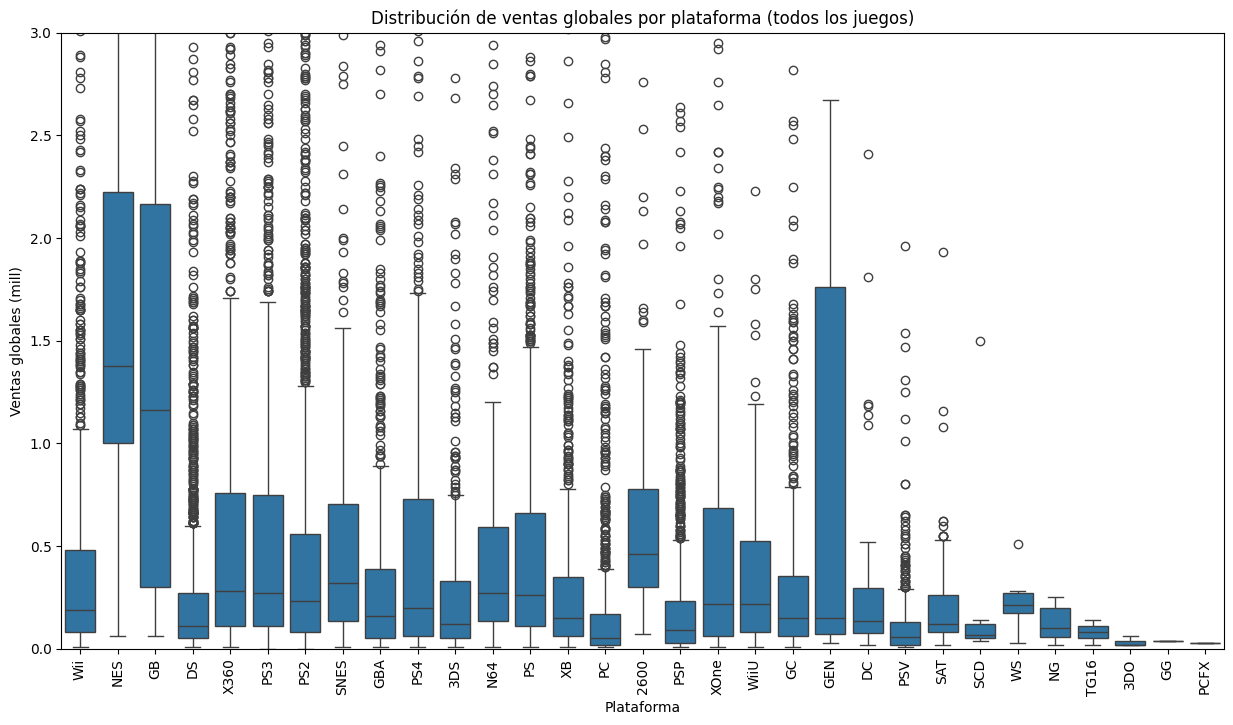

In [24]:
# Diagrama de Caja para las ventas de todos los juegos por plataforma
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_games, x='platform', y='total_sales')
plt.title('Distribución de ventas globales por plataforma (todos los juegos)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales (mill)')
plt.xticks(rotation=90)
plt.ylim(0, 3)  # Opcional: limitar eje Y para ver mejor la mayoría de los datos
plt.show()

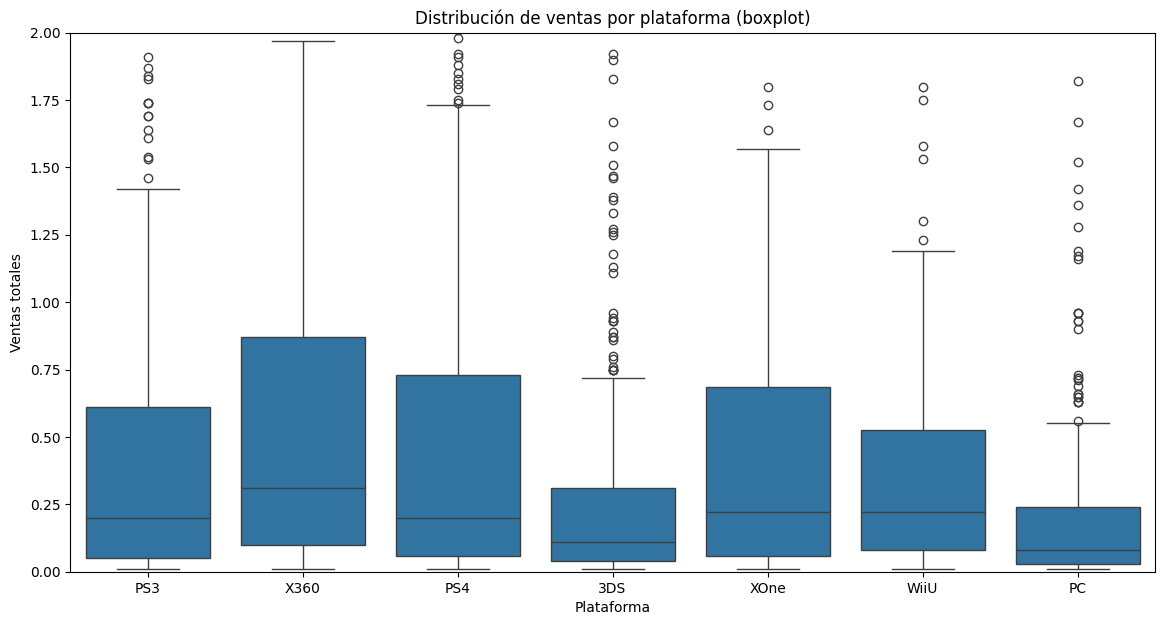

In [23]:
# Diagrama de caja por plataforma, desde el 2012
plt.figure(figsize=(14, 7))
sns.boxplot(data=df_2012[df_2012['platform'].isin(
    top_platforms)], x='platform', y='total_sales')
plt.ylim(0, 2)
plt.title('Distribución de ventas por plataforma (boxplot)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas totales')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho, correcto el gráfico. Se puede apreciar la variabilidad de ventas de cada consola a la escala limitada. Otra opción es usar una escala logarítmica.

</div>

En las Graficas de Distribucion de ventas por plataforma (Diagrama de Caja)
Podemos observar que tienen una distribución asimétrica positiva, esto quiere decir que la mediana esta del extremo inferior de la caja y los bigotes superiores son mas largos que los inferiores. Los datos estan sesgados a la derecha, con valores superiores mas dispersos. 
Las ventas promedio no superan los 0.50 millones de ventas totales.

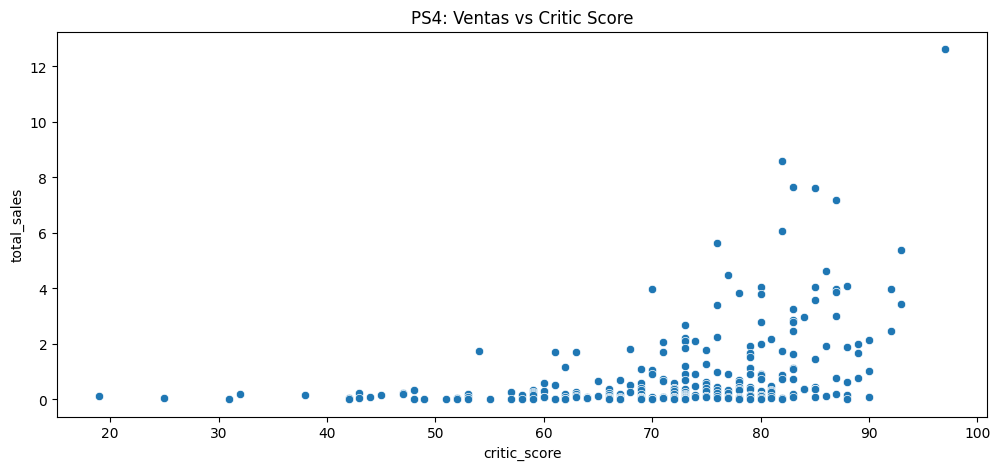

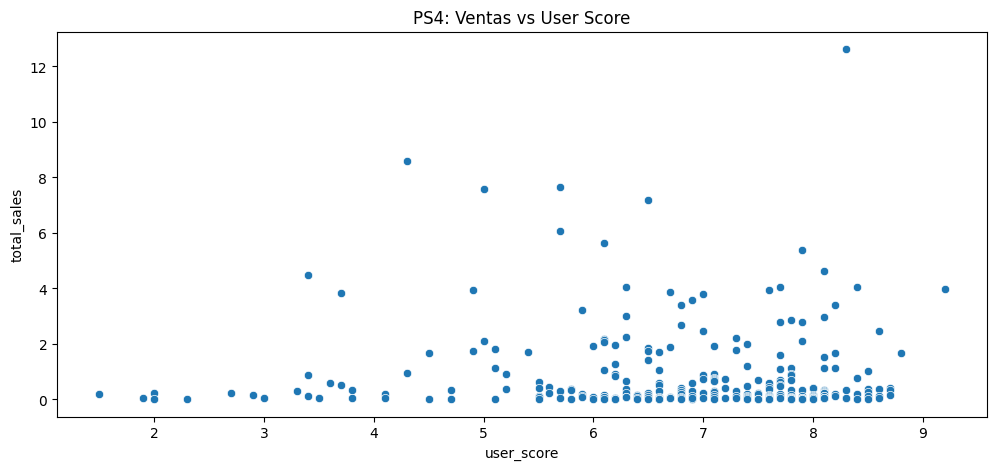

Correlación con Critic Score: 0.40656790206178095
Correlación con User Score: -0.031957110204556376


In [25]:
# Reseñas de Usuarios y Profesionales, seleccione la plataforma PS4
ps4 = df_2012[df_2012['platform'] == 'PS4']

plt.figure(figsize=(12, 5))
sns.scatterplot(data=ps4, x='critic_score', y='total_sales')
plt.title('PS4: Ventas vs Critic Score')
plt.show()

plt.figure(figsize=(12, 5))
sns.scatterplot(data=ps4, x='user_score', y='total_sales')
plt.title('PS4: Ventas vs User Score')
plt.show()

print("Correlación con Critic Score:",
      ps4['critic_score'].corr(ps4['total_sales']))
print("Correlación con User Score:",
      ps4['user_score'].corr(ps4['total_sales']))

Interpretacion de las Graficas de correlacion para las Reseñas de Usuarios y Criticos para la plataforma PS4.
1. Critic Score 0.41, es una correlacion positiva pero moderada entre las reseñas de criticos y las ventas. Esto quiere decir que los juegos con mejores evaluciones por criticos tienden a vender un poco más. Ayuda un buen score pero no garantiza el exito en las ventas.
2. User Scor -0.03, este valor esta muy cerca del 0 y es ligeramente negativo. Lo que significa que no existe una relacion significativa entre las calificaciones de los usuarios y las ventas.


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho con el gráfico y el cálculo del coeficiente. Permite obtener una visión general de la correlación entre ambas variables.

</div>

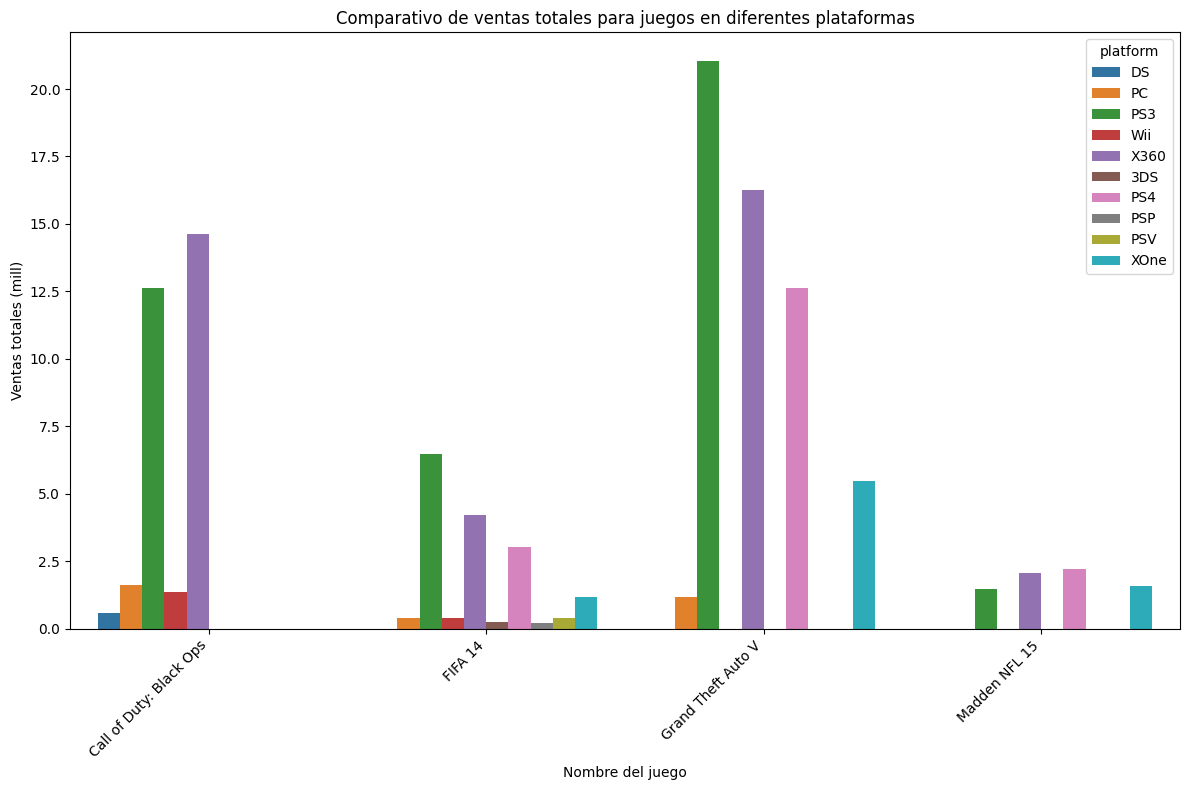

In [26]:
# Compara las ventas los mismos juegos en otras. Buscamos juegos que aparezcan en multiples plataformas
game_counts = df_games.groupby('name')['platform'].nunique().reset_index()
multiplatform_games = game_counts[game_counts['platform'] > 1]

# Filtramos el df_games plara incluir solo los juegos con multiplataformas
df_multiplatform_sales = df_games[df_games['name'].isin(
    multiplatform_games['name'])]

# Agrupamos por juegos y plataformas y calculamos las ventas totales para cada juego en cada plataforma
multiplatform_sales_summary = df_multiplatform_sales.groupby(
    ['name', 'platform'])['total_sales'].sum().reset_index()

# Seleccionamos unos juegos de multiplatadorma para poder visualizar
selected_games = ['Grand Theft Auto V',
                  'Call of Duty: Black Ops', 'FIFA 14', 'Madden NFL 15']

# Filtramos para incluir solo los juegos seleccionados
filtered_multiplatform_sales = multiplatform_sales_summary[multiplatform_sales_summary['name'].isin(
    selected_games)]

# Grafica de barras para una mejor comprension
plt.figure(figsize=(12, 8))
sns.barplot(x='name', y='total_sales', hue='platform',
            data=filtered_multiplatform_sales)
plt.title('Comparativo de ventas totales para juegos en diferentes plataformas')
plt.xlabel('Nombre del juego')
plt.ylabel('Ventas totales (mill)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Conclusion del Comparativo de ventas de Juegos en Multi-Plataformas
* Existe una variacion significativa en las ventas por plataforma. La popularidad o rendimiento del mismo juego no es uniforme en todas las consolas en las que se lanza.
* Por ejemplo, con GTA V: las ventas mas altas son para PS3 y X360. Asimismo pasa con Call of Suty o Fifa 14. Pero tambien estos resultados pueden estar afectados porque las fechas de lanzamientos para las diferentes consolas no sean las mismas.
* La grafica de barras muestra claramente que incluso para los juegos mas populares disponibles en varias plataformas, el exito comercial puede estar fuertemente ligado a la plataforma especifica en la que se juega.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor       </b> <a class="tocSkip"></a>

Muy bien, este análisis nos permite encontrar la competencia de cada consola, o al menos, donde han competido. El gráfico mostrado está muy bien armado, haces bien en tenerlos agrupados por juego y tener a las consolas en barras separadas

</div>

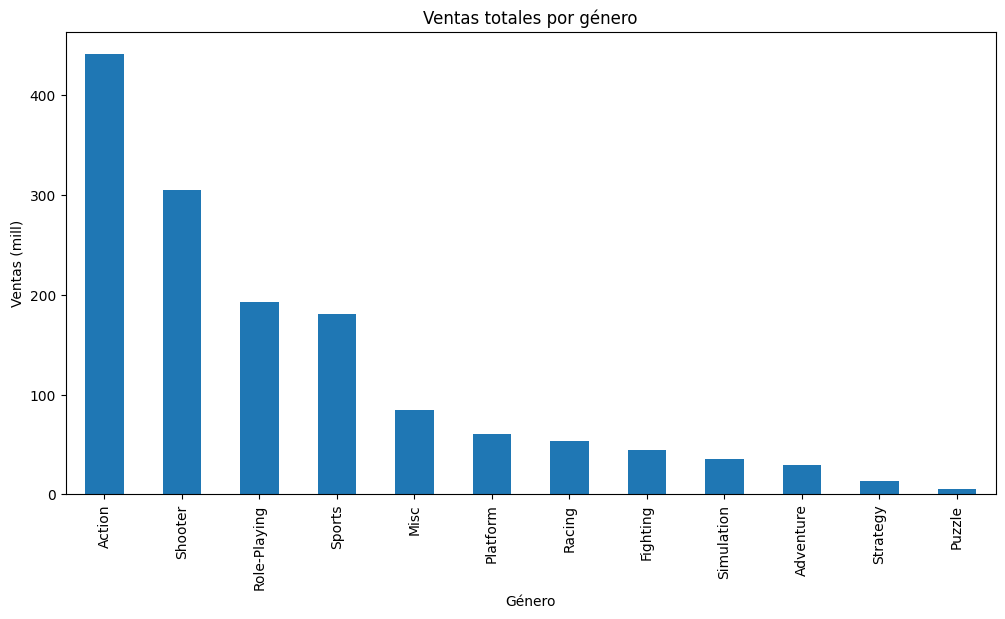

genre
Action          441.12
Shooter         304.73
Role-Playing    192.80
Sports          181.07
Misc             85.04
Platform         61.00
Racing           53.50
Fighting         44.49
Simulation       35.12
Adventure        29.43
Strategy         13.34
Puzzle            4.89
Name: total_sales, dtype: float64


In [27]:
# Distribucion general de los juegos por genero y Grafica de barras para su representacion.
genre_sales = df_2012.groupby(
    'genre')['total_sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar')
plt.title('Ventas totales por género')
plt.xlabel('Género')
plt.ylabel('Ventas (mill)')
plt.show()

print(genre_sales)

Grafica de venta de juegos por su Genero.
1. Aqui podemos observar claramente que el genero mas rentable es el de Action.
2. Le siguen los juegos de Sports, Shooter y Role-Playing.
3. Los juegos menos rentables son Puzze y Strategy.

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Ok con el gráfico, pero la rentabilidad no solo es el total de ventas, sino que también hay que ver la venta promedio por género. Te recomiendo calcular y graficar la venta promedio de cada género.

</div>

Paso 4. Creacion de un perfil de Usuario para cada region

In [28]:
# Top 5 plataformas para cada region
# Region NA
na_top_platforms = df_games.groupby(
    'platform')['na_sales'].sum().sort_values(ascending=False).head(5)

# Region EU
eu_top_platforms = df_games.groupby(
    'platform')['eu_sales'].sum().sort_values(ascending=False).head(5)

# Region JP
jp_top_platforms = df_games.groupby(
    'platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top plataformas NA:\n", na_top_platforms, "\n")
print("Top plataformas EU:\n", eu_top_platforms, "\n")
print("Top plataformas JP:\n", jp_top_platforms, "\n")

Top plataformas NA:
 platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64 

Top plataformas EU:
 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64 

Top plataformas JP:
 platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64 



Conclusion del Top5 de las plataformas por Region, las ventas 
* Norte America. Aqui predomina Microsoft y Sony. Nintendo las sigue de cerca.
* Europa. Aqui tienen mas afinidad por el Play Station.
* Japon. Aqui se inclinan mas por Nintendo y Sony. Microsoft no figura en el top 5.

In [ ]:
# Top 5 Generos  principales por Region
# Top 5 géneros en NA
na_top_genres = df_games.groupby(
    'genre')['na_sales'].sum().sort_values(ascending=False).head(5)

# Top 5 géneros en EU
eu_top_genres = df_games.groupby(
    'genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

# Top 5 géneros en JP
jp_top_genres = df_games.groupby(
    'genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top géneros NA:\n", na_top_genres, "\n")
print("Top géneros EU:\n", eu_top_genres, "\n")
print("Top géneros JP:\n", jp_top_genres, "\n")

Top géneros NA:
 genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64 

Top géneros EU:
 genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64 

Top géneros JP:
 genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64 



Conclusion del Top 5 de Generos por Region.
1. Norte America y Europa comparten los mismos gustos en general por los juegos de Action, Sports y Shooter.
2. El mercado de Japon se maneja diferente. Ellos prefieren los juegos de Role-Playing, despues los de Action, Sports y Platform.

In [ ]:
# Ahora las Regiones por Clasificaciones ESRB
# Ventas por rating en NA
na_rating = df_games.groupby(
    'rating')['na_sales'].sum().sort_values(ascending=False)

# Ventas por rating en EU
eu_rating = df_games.groupby(
    'rating')['eu_sales'].sum().sort_values(ascending=False)

# Ventas por rating en JP
jp_rating = df_games.groupby(
    'rating')['jp_sales'].sum().sort_values(ascending=False)

print("Ventas por rating en NA:\n", na_rating, "\n")
print("Ventas por rating en EU:\n", eu_rating, "\n")
print("Ventas por rating en JP:\n", jp_rating, "\n")

Ventas por rating en NA:
 rating
E       1292.99
T        759.75
M        748.48
E10+     353.32
K-A        2.56
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64 

Ventas por rating en EU:
 rating
E       710.25
M       483.97
T       427.03
E10+    188.52
AO        0.61
K-A       0.27
EC        0.11
RP        0.08
Name: eu_sales, dtype: float64 

Ventas por rating en JP:
 rating
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
AO        0.00
EC        0.00
RP        0.00
Name: jp_sales, dtype: float64 



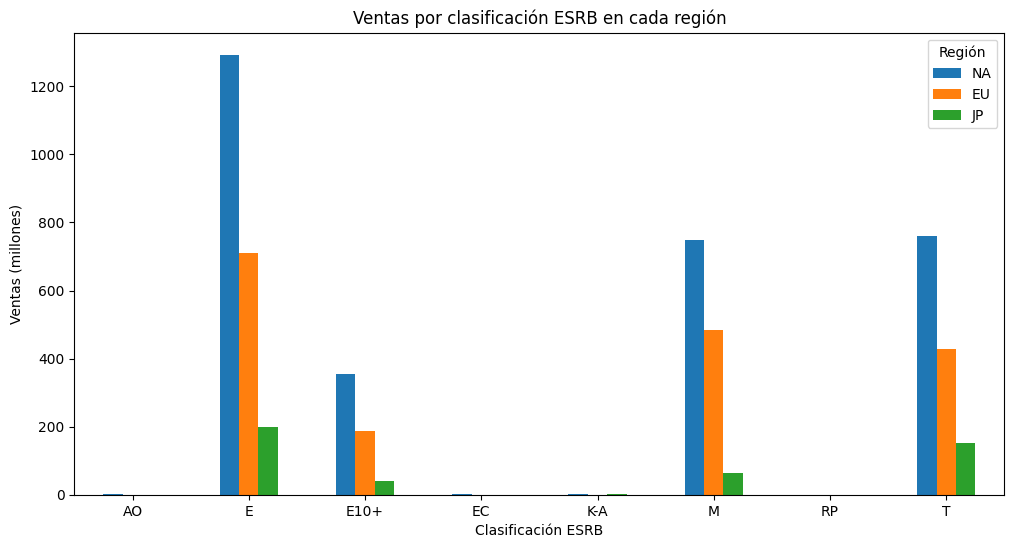

In [ ]:
# GRafica para poder interpretar mejor las ventas por Genero por Region.
# Agrupamos las ventas por rating en cada region
na_sales_rating = df_games.groupby('rating')['na_sales'].sum()
eu_sales_rating = df_games.groupby('rating')['eu_sales'].sum()
jp_sales_rating = df_games.groupby('rating')['jp_sales'].sum()

# Creamos un DataFrame combinado para graficar mejor
ratings_sales = pd.DataFrame({
    'NA': na_sales_rating,
    'EU': eu_sales_rating,
    'JP': jp_sales_rating
}).fillna(0)

# Grafica de barras comparativa
ratings_sales.plot(kind='bar', figsize=(12, 6))
plt.title('Ventas por clasificación ESRB en cada región')
plt.xlabel('Clasificación ESRB')
plt.ylabel('Ventas (millones)')
plt.xticks(rotation=0)
plt.legend(title="Región")
plt.show()

Conclusion de clasificacion ESRB por Regiones. 
1. Gracias a la grafica podemos ver que las 3 regiones tienen preferencia por los juegos con clasificacion E (everyone).
2. En segundo y tercer lugar estan los juegos con clasificacion T (teen) y M (mature), igual para las 3 regiones.
3. Las demas clasificaciones no tienen mucha reelevancia, solo la de E10+ (mayores de 10 años) que queda en el cuarto lugar.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho, muy bien con la comparación entre las regiones. Es importante revisar diferentes dimensiones entre cada uno, esto revela puntos importantes de segmentación que podrían ser beneficiosos para un modelo de predicción. Por ejemplo, observamos que Japón es muy diferente respecto a las otras regiones en varios aspectos, tal vez esto justifique diferentes modelos o reglas para esta región.
    
</div>

Paso 5. Pruebas de hipotesis

Formulacion de hipotesis para las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
1. Hipotesis nula: la media de las calificaciones de los usuarios es igual.
2. Hipotesis alternativa: la media de las calificaciones de los usuarios es diferente.

Usaremos el test t de student para 2 muestras independientes.

valor alfa 5%, que es el mas comun.

In [ ]:
# Filtramos los valores no nulos
xone_scores = df_games[(df_games['platform'] == 'XOne') & (
    df_games['user_score'].notna())]['user_score']
pc_scores = df_games[(df_games['platform'] == 'PC') & (
    df_games['user_score'].notna())]['user_score']

# Prueba t
stat, pval = stats.ttest_ind(
    xone_scores, pc_scores, equal_var=False)  # Welchs t-test
print("Hipótesis - Xbox One vs PC")
print("Estadístico t:", stat)
print("Valor p:", pval)

if pval < 0.05:
    print("Rechazamos Hipotesis nula. Las calificaciones promedio son diferentes.")
else:
    print("No se puede rechazar la hipotesis nula. Las calificaciones promedio son iguales.")

Hipótesis - Xbox One vs PC
Estadístico t: -4.653422798410771
Valor p: 4.935072360183574e-06
Rechazamos Hipotesis nula. Las calificaciones promedio son diferentes.


Conclusion: 
* El valor de p 0.0000049 es mucho menor que el alfa 0.05. Por lo tanto, se rechaza la hipotesis nula y se acepta la alternativa, las calificaciones son diferentes.
* Significa que los jugadores perciben de forma distinta los juegos en Xbox y en PC. Puede ser por factores como difrerencias en la experiencia de juego. Preferencias en jugar en consola en vez de en una PC o viceversa. O un posible sesgo en los tipos de juegos mas populares en cada plataforma.

Formulacion de hipotesis para las calificaciones promedio de los usuarios para los generos de Accion y Deportes son diferentes.
1. Hipotesis nula: La media de las calificaciones promedio de los usuarios es igual.
2. Hipotesis alternativa: La media de las calificaciones promedio de los usuarios es diferente.

Usaremos nuevamente un t-test para 2 muestras independientes.

Valor alfa 5%

In [ ]:
# Filtramos los valores no nulos
action_scores = df_games[(df_games['genre'] == 'Action') & (
    df_games['user_score'].notna())]['user_score']
sports_scores = df_games[(df_games['genre'] == 'Sports') & (
    df_games['user_score'].notna())]['user_score']

# Prueba t
stat, pval = stats.ttest_ind(action_scores, sports_scores, equal_var=False)
print("\nHipótesis - Accion vs Deportes")
print("Estadistico t:", stat)
print("Valor p:", pval)

if pval < 0.05:
    print("Rechazamos la hipotesis nula. Las calificaciones promedio son diferentes.")
else:
    print("No se puede rechazar la hipotesis nula. Las calificaciones promedio son iguales.")


Hipótesis - Accion vs Deportes
Estadistico t: 1.57746791633354
Valor p: 0.11483818791498286
No se puede rechazar la hipotesis nula. Las calificaciones promedio son iguales.


Conclusion:
* El valorp es 0.115 es mayor al alfa 0.05. Esto quiere decir que no hay evidencia suficiente para rechazar la hipotesis nula, por lo tanto, aceptamos que las calificaciones promedio de los generos de Accion y Deportes son iguales.
* Al parecer, los usuarios o jugadores no distinguen de forma significativa en sus reseñas promedio entre juegos de accion o deporte. Esto quiere decir, que independientemente del genero, la calidad percibida por los usuarios es similar. Los valoran de forma parecida. 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho con los tests, fueron realizados de forma correcta. 

Es importante mencionar que el t-test asume que las dos muestras tienen varianzas iguales Para verificar esa igualdad de varianzas podemos usar el **test de Levene**. Este nos dice si la variabilidad entre los grupos es *estadísticamente diferente*. En futuros notebooks podrías utilizar este test para decidir sobre la igualdad de varianzas. En corto, el flujo sería así

1. Usamos `levene()` para verificar si las varianzas son iguales.
2. Dependiendo del resultado, usamos `ttest_ind()` con el argumento `equal_var`:
   - `equal_var=True` si Levene dice que las varianzas son iguales (p > 0.05).
   - `equal_var=False` si Levene dice que las varianzas son diferentes (p < 0.05).

</div>

Paso 6. Conclusion General

De acuerdo a todos los analisis que hice durante este proyecto mis recomendaciones para la tienda online Ice que vende videojuegos son:
1. Hacer una campaña especificamente para el mercado de Japon, con juegos del genero role-playing y con clasificacion E para todos.
2. Hacer otra campaña para Norte America y Europa en donde se enfoquen en juegos de Accion y Deportes con clasificacion E para todos.
3. Viendo que las ventas han bajado en las diferentes consolas hasta el 2015-2016, y no aparece informacion sobre una plataforma nueva para llegar al mercado. Es buscar la opcion de venta de videojuegos para Realidad Virtual, esto con el fin de poder subir las ventas y ampliar un poco mas nuestro mercado, siempre estando a la vanguardia en los nuevos tiempos. 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Muy bien con estas conclusiones. Entre los puntos más importantes para el pronóstico de 2017 están las plataformas que serán relevantes, la segmentación de géneros por importancia de ventas y la caracterización de cada región. Para realizar una predicción del siguiente año se podría considerar cada segmento por separado para ajustar diferentes modelos.
    
Podrías mejorar tus conclusiones incluyendo algunos valores de las métricas más importantes, así las afirmaciones realizadas estarían mejor apoyadas en hechos.
    
</div>

In [ ]:
import pandas as pd